In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [ ]:
#importing the Data Frame(DF)
df = pd.read_excel('netflix.xlsx')
df.head(10)

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,Children & Family Movies
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,"British TV Shows, Reality TV"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas"


# **EDA**

In [ ]:
#Dimension of DF
df.shape

(8807, 7)

In [ ]:
#info gives information about DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          8807 non-null   object
 1   Title         8807 non-null   object
 2   Director      8807 non-null   object
 3   Cast          8807 non-null   object
 4   Country       8807 non-null   object
 5   Release_year  8807 non-null   int64 
 6   Genres        8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [ ]:
#number of unique values in each column of DF
df.nunique()

Type               2
Title           8807
Director        4529
Cast            7693
Country          749
Release_year      74
Genres           514
dtype: int64

In [ ]:
#Total null values in DF
df.isnull().sum().sum()

0

In [ ]:
#null values in DF by column 
df.isnull().sum()

Type            0
Title           0
Director        0
Cast            0
Country         0
Release_year    0
Genres          0
dtype: int64

In [ ]:
#Replacing Nan values with Unavailable
df['Director'].fillna('Not_available', inplace=True)
df['Cast'].fillna('Not_available', inplace=True)
df['Country'].fillna('Country_Unavailable', inplace=True)

In [ ]:
#Again checking null values in DF
df.isnull().sum()

Type            0
Title           0
Director        0
Cast            0
Country         0
Release_year    0
Genres          0
dtype: int64

In [ ]:
#Unique values in Type column
df['Type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
#Making new Data frame for plot/EDA using '.copy'
df_movies = df[df['Type']=='Movie'].copy()
df_shows = df[df['Type']=='TV Show'].copy()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


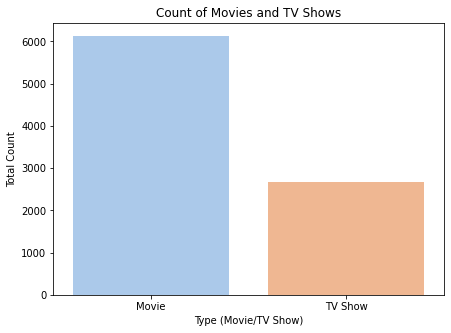

In [ ]:
#plotting the count of movies and TV shows in Data Frame
plt.figure(figsize=(7,5))
g = sns.countplot(df.Type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()
#From the plotting we can see this that movie count is three times TV show

In [ ]:
#Printing columns name of DF
df.columns

Index(['Type', 'Title', 'Director', 'Cast', 'Country', 'Release_year',
       'Genres'],
      dtype='object')

In [ ]:
#df_year is the count of total(movies + TV shows) per year
df_year = df['Release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
df_year = df_year.rename(columns={'Release_year': 'count'})

In [ ]:
data = df[['Release_year', 'Type']]
#movie_year is the count of moives per year
movie_year = data[data['Type']=='Movie'].Release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year.rename(columns={'Release_year': 'count'})
#movie_year is the count of TV shows per year
show_year = data[data['Type']=='TV Show'].Release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year.rename(columns={'Release_year': 'count'})

In [ ]:
#Printing from when Movies started and upto which year the data is available
print(df['Release_year'].max()) 
print(df['Release_year'].min()) 

2021
1925


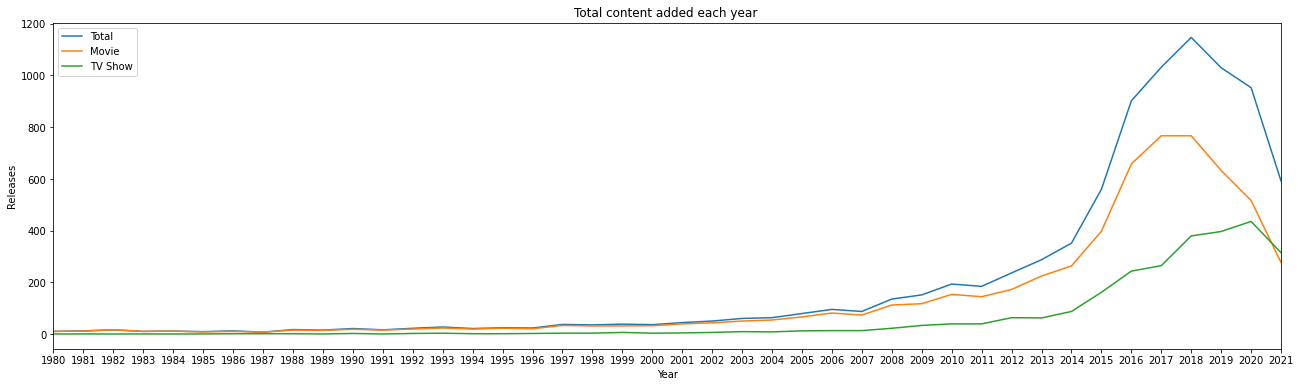

In [ ]:
#Plotting how movies/TV shows and Total number increase with year from 1980 to 2021
fig, ax = plt.subplots(figsize=(22, 6))
sns.lineplot(data=df_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xlim(1980,2021)
ax.set_xticks(np.arange(1980, 2022, 1))
plt.title("Total content added each year ")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

In [ ]:
#grouping the data country wise
country_counts = df.groupby('Country').size().reset_index(name='count')
country_counts = country_counts[country_counts['Country'] != 'Country_Unavailable']
most_movie = country_counts.sort_values(by='count', ascending=False).head(5)

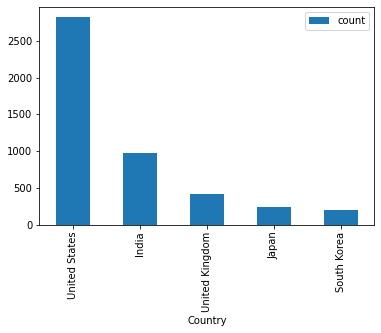

In [ ]:
#Top 5 countries with most movies
ax = most_movie.plot.bar(x='Country', y='count')

In [ ]:
#Grouping the data by director
director_counts = df.groupby('Director').size().reset_index(name='count')
director_counts = director_counts[director_counts['Director'] != 'Not_available'] #this is to remove Not_available data in DF
# sort by number top 5 directors
top_directors = director_counts.sort_values(by='count', ascending=False).head(5)
top_directors

,Director,count
3393,Rajiv Chilaka,19
3444,"Raúl Campos, Jan Suter",18
4047,Suhas Kadav,16
2598,Marcus Raboy,16
1790,Jay Karas,14


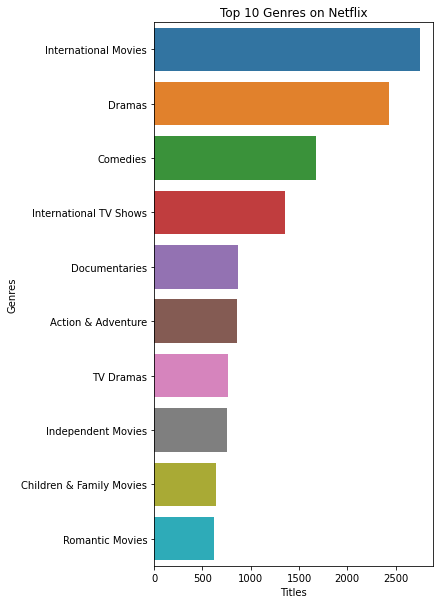

In [ ]:
#to get Top 10 genres of all tiems
genres_filtred = df.set_index('Title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(5,10))
g = sns.countplot(y = genres_filtred, order=genres_filtred.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

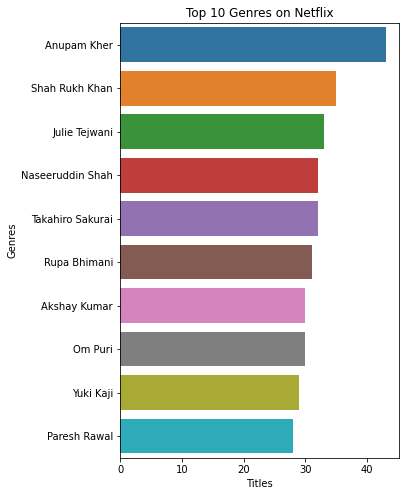

In [ ]:
#To get top 10 actors of all times
actor_filtered = df.set_index('Title').Cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
actor_filtered = actor_filtered[actor_filtered != 'Not_available']
plt.figure(figsize=(5,8))
g = sns.countplot(y = actor_filtered, order=actor_filtered.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

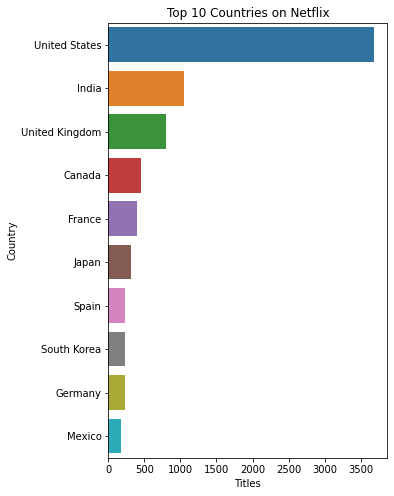

In [ ]:
#Top 10 countries with most movie produced
countries_filtered = df.set_index('Title').Country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries_filtered = countries_filtered[countries_filtered != 'Country_Unavailable']
plt.figure(figsize=(5,8))
g = sns.countplot(y = countries_filtered, order=countries_filtered.value_counts().index[:10])
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
#The is to get top directors of recent time who Directors most movies
df_movies_latest = df_movies[df_movies['Release_year'] >= 2016]
df_movies_latest = df_movies_latest[df_movies_latest['Director'] !='Not_available']
director_counts_latest = df_movies_latest.groupby("Director").size().reset_index(name="count")
director_counts_latest = director_counts_latest.sort_values("count", ascending=False)
top_directors_latest = director_counts_latest.head(2)
top_directors_latest

,Director,count
2224,"Raúl Campos, Jan Suter",18
1664,Marcus Raboy,14


In [ ]:
#The is to get top Cast of recent time who appeared in most movies
df_actor_latest = df_movies[df_movies['Release_year'] >= 2016]
df_actor_latest = df_actor_latest[df_actor_latest['Cast'] !='Not_available']
df_actor_latest = df_actor_latest.groupby("Cast").size().reset_index(name="count")
df_actor_latest = df_actor_latest.sort_values("count", ascending=False)
top_actor_latest = df_actor_latest.head(2)
top_actor_latest

,Cast,count
621,Craig Sechler,6
1992,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",5
